In [12]:
!pip install smplx[all] # https://github.com/vchoutas/smplx
!pip install chumpy
!pip uninstall numpy -y
!pip install numpy==1.23.1
!pip install mano

Found existing installation: numpy 1.23.1
Uninstalling numpy-1.23.1:
  Successfully uninstalled numpy-1.23.1
  Using cached numpy-1.23.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.2 kB)
Using cached numpy-1.23.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.23.1 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.23.1 which is incompatible.
bigframes 1.25.0 requires numpy>=1.24.0, but you have numpy 1.23.1 which is incompatible.
chex 0.1.87 requires numpy>=1.24.1, but you have numpy 1.23.1 which is incompatible.
ibis-framework 9.2.0 requires numpy<3,>=1.23.2, but you have numpy 1.23.1 which is incompatible.
jax 0.4.33 requires numpy>=1.24, but you have numpy 1.23.1 w

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/operations/check.py", line 43, in create_package_set_from_installed
    package_set[name] = PackageDetails(dist.version

In [1]:
import smplx
import numpy as np
import torch
import trimesh

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Initialize  Model

In [3]:
model_folder = '/content/drive/MyDrive//IITMXRSummit/SMPL_NEUTRAL_1.pkl' # Modify path as per your directory structure
# Download model from: https://smpl.is.tue.mpg.de/;
model_type = 'smpl'
gender = 'neutral'
num_betas = 10
# num_joints=23
# body_pose = torch.zeros([1, num_joints * 3])

model = smplx.create(model_folder, model_type=model_type, gender=gender, num_betas=num_betas)
print(model)

SMPL(
  Gender: NEUTRAL
  Number of joints: 24
  Betas: 10
  (vertex_joint_selector): VertexJointSelector()
)


### Get Mesh in Rest Pose

In [4]:
def get_smpl_mesh(betas=None, body_pose=None, global_orient=None):
    output = model(betas=betas, return_verts=True, body_pose=body_pose, global_orient=global_orient)
    # print(output)

    vertices = output.vertices.detach().cpu().numpy().squeeze()
    joints = output.joints.detach().cpu().numpy().squeeze()

    # print('Vertices shape =', vertices.shape)
    # print('Joints shape =', joints.shape)
    mesh_out = trimesh.Trimesh(vertices, model.faces) # Notice
    return mesh_out


In [5]:
betas = torch.zeros([1,10])
num_joints = 23
body_pose = torch.zeros([1, num_joints*3])
mesh_out = get_smpl_mesh(betas=betas, body_pose=body_pose)
_ = mesh_out.export("smpl.obj") # Dump
mesh_out.show()


### Shape Variations

In [6]:
betas = torch.ones([1,10])*8
#betas=np.array([[0.3,0.2,0.1,0.5,1,1,1,1,0.5,1]]);
#betas=torch.from_numpy(betas.astype(np.float))


#betas[1]=0.5
num_joints = 23
body_pose = torch.zeros([1, num_joints*3])
mesh_out = get_smpl_mesh(betas=betas, body_pose=body_pose)
_ = mesh_out.export("smpl1.obj") # Dump
mesh_out.show()


In [7]:
betas = torch.rand([1,10])
num_joints = 23
body_pose = torch.zeros([1, num_joints*3])
mesh_out = get_smpl_mesh(betas=betas, body_pose=body_pose)
_ = mesh_out.export("smpl2.obj") # Dump
mesh_out.show()


In [8]:
betas = torch.ones([1,10]) * 5
num_joints = 23
body_pose = torch.zeros([1, num_joints*3])
mesh_out = get_smpl_mesh(betas=betas, body_pose=body_pose)
_ = mesh_out.export("smpl3.obj") # Dump
mesh_out.show()

### Pose Variations

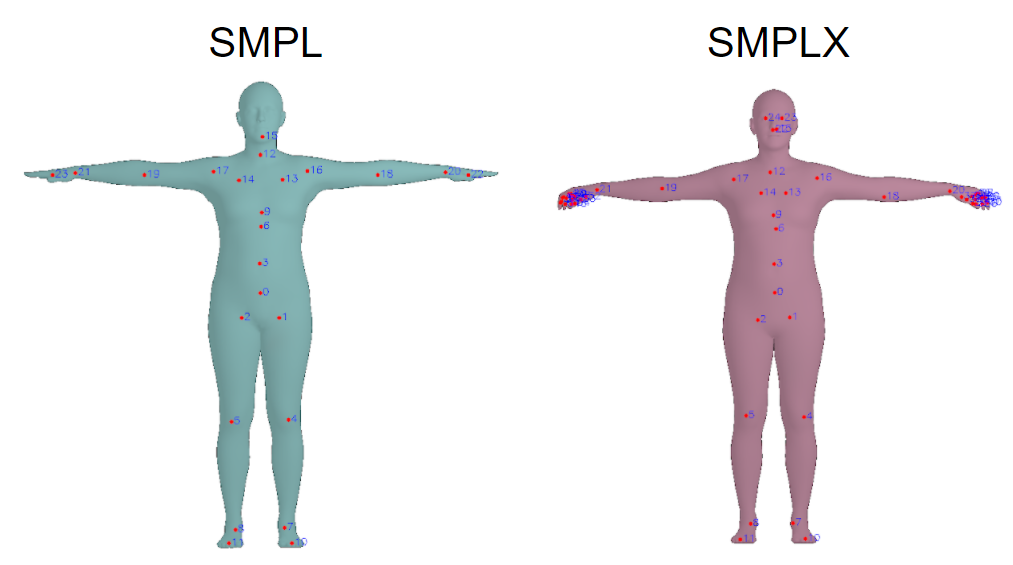

Image Source: https://github.com/facebookresearch/frankmocap/issues/91

### Changing the Pose of the Body

In [9]:
betas = torch.zeros([1,10])
num_joints = 23
body_pose = torch.zeros([1, num_joints*3])
body_pose[:, 6] = np.pi/3  #Edit here to get different poses
mesh_out = get_smpl_mesh(betas=betas, body_pose=body_pose)
# _ = mesh_out.export("smpl3.obj") # Dump
mesh_out.show()

In [10]:
betas = torch.zeros([1,10])
num_joints = 23
body_pose = torch.zeros([1, num_joints*3])
body_pose[:, 7] = np.pi/2 #Edit here to get different poses
mesh_out = get_smpl_mesh(betas=betas, body_pose=body_pose)
# _ = mesh_out.export("smpl3.obj") # Dump
mesh_out.show()

In [11]:
betas = torch.zeros([1,10])
num_joints = 23
body_pose = torch.zeros([1, num_joints*3])
body_pose[:, 8] = np.pi/2 #Edit here to get different poses
mesh_out = get_smpl_mesh(betas=betas, body_pose=body_pose)
# _ = mesh_out.export("smpl3.obj") # Dump
mesh_out.show()

In [12]:
betas = torch.zeros([1,10])
num_joints = 23
body_pose = torch.zeros([1, num_joints*3])
global_orient = torch.zeros(1, 3)
global_orient[:, 2] = np.pi/2
mesh_out = get_smpl_mesh(betas=betas, body_pose=body_pose, global_orient=global_orient)
mesh_out.show()

In [13]:
import mano


In [14]:
hand_model_folder = '/content/drive/MyDrive//IITMXRSummit/MANO_RIGHT.pkl'
model = smplx.create(hand_model_folder, model_type='smplx',
                     gender='neutral', num_pca_comps=48, flat_hand_mean=False)

In [15]:
hand_betas = torch.ones([1,10],dtype=torch.float32)
hand_pose = torch.zeros([1,15*3])
output = model(betas=hand_betas, hand_pose = hand_pose, return_verts=True)
hand_vertices = output.vertices.detach().cpu().numpy().squeeze()
hand_joints = output.joints.detach().cpu().numpy().squeeze()

hand_mesh_out = trimesh.Trimesh(hand_vertices,model.faces)
hand_mesh_out.visual.face_colors = [200, 200, 250, 100]
hand_mesh_out.show()
